<a href="https://colab.research.google.com/github/JovannyReb/etch-a-sketch/blob/main/main_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
!rm -r truth_data testing_data/ analysis_results/

rm: cannot remove 'truth_data': No such file or directory
rm: cannot remove 'testing_data/': No such file or directory
rm: cannot remove 'analysis_results/': No such file or directory


In [ ]:
# Handle the testing data
!unzip temp_truth.zip

Archive:  temp_truth.zip
   creating: temp_truth/
  inflating: temp_truth/30938655.csv  
  inflating: temp_truth/30982325.csv  
  inflating: temp_truth/30982783.csv  
  inflating: temp_truth/31001165.csv  
  inflating: temp_truth/31103588.csv  
  inflating: temp_truth/31153880.csv  
  inflating: temp_truth/31196671.csv  
  inflating: temp_truth/31204836.csv  
  inflating: temp_truth/31246373.csv  
  inflating: temp_truth/31283412.csv  
  inflating: temp_truth/31295073.csv  
  inflating: temp_truth/31324460.csv  
  inflating: temp_truth/31348682.csv  
  inflating: temp_truth/31390241.csv  
  inflating: temp_truth/31437217.csv  
  inflating: temp_truth/31459326.csv  
  inflating: temp_truth/31473017.csv  
  inflating: temp_truth/31473024.csv  
  inflating: temp_truth/31473036.csv  
  inflating: temp_truth/31473056.csv  
  inflating: temp_truth/31473073.csv  
  inflating: temp_truth/31473189.csv  
  inflating: temp_truth/31473500.csv  
  inflating: temp_truth/31473571.csv  
  inflating: t

In [ ]:
# prompt: remove the current analysis_results and testing data
!rm -r analysis_results testing_data

In [ ]:
folder_path = "testing_data"
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, sep=";")
        df.to_csv(file_path, index=False, sep=",")
        print(df.head())
        print("-" * 40)

   Page Classification Result  Document Index  Page Index  \
0     1          06 (FRM-AR1)               1           1   
1     2       01 (DOC-BRIEFS)               2           1   
2     3       01 (DOC-BRIEFS)               3           1   
3     4          06 (FRM-AR1)               4           1   
4     5          06 (FRM-AR1)               4           2   

  Page Split Confidence Page Classification Confidence  \
0                 0.00%                         99.90%   
1                 0.00%                         99.96%   
2                 0.00%                        100.00%   
3                 0.00%                         99.97%   
4                 0.00%                         98.25%   

       Page Classification Result  Unnamed: 7  
0  997 (EMAILCOVER) - Single Page         NaN  
1   01 (DOC-BRIEFS) - Single Page         NaN  
2  999 (COVERSHEET) - Single Page         NaN  
3       06 (FRM-AR1) - Start Page         NaN  
4      06 (FRM-AR1) - Middle Page         Na

In [ ]:
folder_path = "testing_data"
testing_data = []  # List to hold the DataFrames

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)

        # Load CSV nt)
        df = pd.read_csv(file_path)

        # Append the DataFrame to the list
        testing_data.append(df)

        # Optional preview
        print(f"Loaded: {filename}")
        print(df.head())
        print("-" * 40)

Loaded: Results_32191739.csv
   Page Classification Result  Document Index  Page Index  \
0     1          06 (FRM-AR1)               1           1   
1     2       01 (DOC-BRIEFS)               2           1   
2     3       01 (DOC-BRIEFS)               3           1   
3     4          06 (FRM-AR1)               4           1   
4     5          06 (FRM-AR1)               4           2   

  Page Split Confidence Page Classification Confidence  \
0                 0.00%                         99.90%   
1                 0.00%                         99.96%   
2                 0.00%                        100.00%   
3                 0.00%                         99.97%   
4                 0.00%                         98.25%   

       Page Classification Result  Unnamed: 7  
0  997 (EMAILCOVER) - Single Page         NaN  
1   01 (DOC-BRIEFS) - Single Page         NaN  
2  999 (COVERSHEET) - Single Page         NaN  
3       06 (FRM-AR1) - Start Page         NaN  
4      06 (FRM-

In [ ]:
# Cleaning the testing_data
for df in testing_data:
  df.drop(columns=['Unnamed: 7'], inplace=True)

In [ ]:
# --- Load TRUTH DataFrames with sorting ---

truth_folder_path = "truth_data"
truth_dfs = []
blobs = []

print("Loading TRUTH data frames...")

# 1. Get filenames and SORT them alphabetically. This is the crucial step.
sorted_truth_filenames = sorted(os.listdir(truth_folder_path))

# 2. Loop through the *sorted* list of filenames.
for filename in sorted_truth_filenames:
  if filename.endswith(".csv"):
      file_path = os.path.join(truth_folder_path, filename)
      df = pd.read_csv(file_path)
      truth_dfs.append(df)

      # --- NEW: Extract the blob name and append it to the list ---
      # os.path.splitext splits "31103588.csv" into ('31103588', '.csv')
      # We take the first part [0] which is the name we want.
      blob_name = os.path.splitext(filename)[0]
      blobs.append(blob_name)
      # -------------------------------------------------------------
      print(f"  Loaded: {filename}")

print("-" * 40)


# --- Load TESTING DataFrames with sorting ---

test_folder_path = "testing_data"
test_dfs = []

print("Loading TESTING data frames...")

# 1. Get filenames and SORT them alphabetically here as well.
sorted_test_filenames = sorted(os.listdir(test_folder_path))

# 2. Loop through the *sorted* list.
for filename in sorted_test_filenames:
  if filename.endswith(".csv"):
      file_path = os.path.join(test_folder_path, filename)
      df = pd.read_csv(file_path)
      # Your step to remove unnamed columns is good.
      df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]
      test_dfs.append(df)
      print(f"  Loaded: {filename}")

print("-" * 40)

print(blobs)

Loading TRUTH data frames...
  Loaded: 30938655.csv
  Loaded: 30982325.csv
  Loaded: 30982783.csv
  Loaded: 31001165.csv
  Loaded: 31103588.csv
  Loaded: 31153880.csv
  Loaded: 31196671.csv
  Loaded: 31204836.csv
  Loaded: 31246373.csv
  Loaded: 31283412.csv
  Loaded: 31295073.csv
  Loaded: 31324460.csv
  Loaded: 31348682.csv
  Loaded: 31390241.csv
  Loaded: 31437217.csv
  Loaded: 31459326.csv
  Loaded: 31473017.csv
  Loaded: 31473024.csv
  Loaded: 31473036.csv
  Loaded: 31473056.csv
  Loaded: 31473073.csv
  Loaded: 31473189.csv
  Loaded: 31473500.csv
  Loaded: 31473571.csv
  Loaded: 31490651.csv
  Loaded: 31491263.csv
  Loaded: 31532777.csv
  Loaded: 31541721.csv
  Loaded: 31569985.csv
  Loaded: 31570142.csv
  Loaded: 31606134.csv
  Loaded: 31614737.csv
  Loaded: 31664359.csv
  Loaded: 31665027.csv
  Loaded: 31665157.csv
  Loaded: 31665425.csv
  Loaded: 31750735.csv
  Loaded: 31877919.csv
  Loaded: 31978854.csv
  Loaded: 31986262.csv
  Loaded: 32057314.csv
  Loaded: 32079977.csv
  Loa

In [ ]:
for i, (truth_df, test_df) in enumerate(zip(truth_dfs, test_dfs)):

    print(f"--- Comparing Pair {i+1} ---")

    # Get the number of rows for each DataFrame
    truth_rows = truth_df.shape[0]  # Or you can use len(truth_df)
    test_rows = test_df.shape[0]    # Or you can use len(test_df)

    # --- THE AUTOMATED CHECK ---
    if truth_rows == test_rows:
        # If they match, print a confirmation message.
        print(f"✅ Row counts match: {truth_rows}")
    else:
        # If they DON'T match, print a prominent warning.
        print(f"🚨🚨🚨 WARNING: ROW COUNT MISMATCH! 🚨🚨🚨")
        print(f"  - Truth DataFrame has {truth_rows} rows.")
        print(f"  - Test DataFrame has {test_rows} rows.")
        # This is a good place to consider stopping the script if it's a critical error
        # raise ValueError(f"Row count mismatch in pair {i+1}")

--- Comparing Pair 1 ---
✅ Row counts match: 348
--- Comparing Pair 2 ---
✅ Row counts match: 762
--- Comparing Pair 3 ---
✅ Row counts match: 179
--- Comparing Pair 4 ---
✅ Row counts match: 468
--- Comparing Pair 5 ---
✅ Row counts match: 254
--- Comparing Pair 6 ---
✅ Row counts match: 151
--- Comparing Pair 7 ---
✅ Row counts match: 220
--- Comparing Pair 8 ---
✅ Row counts match: 167
--- Comparing Pair 9 ---
✅ Row counts match: 149
--- Comparing Pair 10 ---
✅ Row counts match: 178
--- Comparing Pair 11 ---
✅ Row counts match: 186
--- Comparing Pair 12 ---
✅ Row counts match: 1134
--- Comparing Pair 13 ---
✅ Row counts match: 177
--- Comparing Pair 14 ---
✅ Row counts match: 204
--- Comparing Pair 15 ---
✅ Row counts match: 256
--- Comparing Pair 16 ---
✅ Row counts match: 209
--- Comparing Pair 17 ---
✅ Row counts match: 172
--- Comparing Pair 18 ---
✅ Row counts match: 236
--- Comparing Pair 19 ---
✅ Row counts match: 179
--- Comparing Pair 20 ---
✅ Row counts match: 158
--- Comp

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define the main output folder
main_output_folder = "analysis_results"
os.makedirs(main_output_folder, exist_ok=True)
print(f"Main output will be saved in: '{main_output_folder}/'\n" + "-"*50)

# INITIALIZE
mean_accuracy = []
overall_classified_count = 0
overall_unclassified_count = 0

# Master lists to hold all labels from all files for the final report
overall_y_true = []
overall_y_pred = []


# Loop through all files
for i, (truth_df, test_df) in enumerate(zip(truth_dfs, test_dfs)):
    current_blob_id  = blobs[i]
    blob_folder_path = os.path.join(main_output_folder, current_blob_id)
    os.makedirs(blob_folder_path, exist_ok=True)

    print(f"Processing Blob ID: {current_blob_id}")

    # Merge truth + prediction
    df = pd.concat([truth_df, test_df], axis=1)
    df["Correct"] = (df["Truth"] == df["Classification Result"]).astype(int)

    # ACCUMULATE the true and predicted labels for the overall report
    overall_y_true.extend(df['Truth'].tolist())
    overall_y_pred.extend(df['Classification Result'].tolist())

    # The program will stop with an AssertionError if this is not true.
    assert len(overall_y_true) == len(overall_y_pred), "CRITICAL: Mismatch in list lengths!"

    # Overall accuracy
    accuracy = df["Correct"].mean()
    print(f"  Accuracy: {accuracy:.2%}")
    mean_accuracy.append(accuracy)

    # Stick accuracy in the first row
    df["Accuracy"] = np.nan
    df.at[0, "Accuracy"] = accuracy

    # Reorder “Correct” column directly after “Classification Result”
    correct = df.pop("Correct")
    insert_loc = df.columns.get_loc("Classification Result") + 1
    df.insert(insert_loc, "Correct", correct)

    # Save the merged CSV
    csv_output_path = os.path.join(blob_folder_path, f"{current_blob_id}.csv")
    df.to_csv(csv_output_path, index=False)
    print(f"  - Saved data to: {csv_output_path}")

    # 1) Top 10 Misclassifications
    cm = pd.crosstab(df["Truth"], df["Classification Result"])
    for lbl in cm.index.intersection(cm.columns):
        cm.at[lbl, lbl] = 0
    mis_flat = cm.stack().reset_index().rename(columns={0: "Count"})
    top_mis  = mis_flat.sort_values("Count", ascending=False).head(10)

    if not top_mis.empty:
        labels = top_mis.apply(lambda r: f"{r['Truth']} → {r['Classification Result']}", axis=1)
        counts = top_mis["Count"]

        plt.figure(figsize=(6,4))
        plt.bar(labels, counts)
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Number of Misses")
        plt.title(f"Top 10 Misclassifications for Blob ID: {current_blob_id}")
        plt.tight_layout()
        plot1_path = os.path.join(blob_folder_path, f"{current_blob_id}_misclassifications.png")
        plt.savefig(plot1_path, dpi=300)
        plt.close()
        print(f"  - Saved plot: {os.path.basename(plot1_path)}")

    # 2) Share of <unclassified>
    counts = df["Classification Result"].value_counts()
    uncls = counts.get("<unclassified>", 0)
    cls   = counts.sum() - uncls

    # ACCUMULATE the counts from the current DataFrame to the overall totals.
    overall_classified_count += cls
    overall_unclassified_count += uncls

    plt.figure(figsize=(5,5))
    plt.pie([cls, uncls],
            labels=["Classified", "<unclassified>"],
            autopct="%1.1f%%",
            startangle=90)
    plt.title("Share of <unclassified> Pages")
    plt.axis("equal")
    plt.tight_layout()
    plot2_path = os.path.join(blob_folder_path, f"{current_blob_id}_unclassified_share.png")
    plt.savefig(plot2_path, dpi=300)
    plt.close()
    print(f"  - Saved plot: {os.path.basename(plot2_path)}")

    # 3) Effect of <unclassified> on Accuracy
    total_acc    = accuracy
    filtered_acc = df[df["Classification Result"] != "<unclassified>"]["Correct"].mean()
    if pd.isna(filtered_acc): filtered_acc = 0.0

    scenarios = ["With <unclassified>", "Without <unclassified>"]
    values    = [total_acc, filtered_acc]

    plt.figure(figsize=(6,4))
    plt.bar(scenarios, values)
    plt.ylim(0,1)
    for idx, val in enumerate(values):
        plt.text(idx, val + 0.02, f"{val:.1%}", ha="center")
    plt.ylabel("Accuracy")
    plt.title("Effect of <unclassified> Pages on Accuracy")
    plt.tight_layout()
    plot3_path = os.path.join(blob_folder_path, f"{current_blob_id}_unclassified_impact.png")
    plt.savefig(plot3_path, dpi=300)
    plt.close()
    print(f"  - Saved plot: {os.path.basename(plot3_path)}")

    print("-" * 50)

Main output will be saved in: 'analysis_results/'
--------------------------------------------------
Processing Blob ID: 30938655
  Accuracy: 90.23%
  - Saved data to: analysis_results/30938655/30938655.csv
  - Saved plot: 30938655_misclassifications.png
  - Saved plot: 30938655_unclassified_share.png
  - Saved plot: 30938655_unclassified_impact.png
--------------------------------------------------
Processing Blob ID: 30982325
  Accuracy: 91.21%
  - Saved data to: analysis_results/30982325/30982325.csv
  - Saved plot: 30982325_misclassifications.png
  - Saved plot: 30982325_unclassified_share.png
  - Saved plot: 30982325_unclassified_impact.png
--------------------------------------------------
Processing Blob ID: 30982783
  Accuracy: 87.71%
  - Saved data to: analysis_results/30982783/30982783.csv
  - Saved plot: 30982783_misclassifications.png
  - Saved plot: 30982783_unclassified_share.png
  - Saved plot: 30982783_unclassified_impact.png
--------------------------------------------

In [ ]:
print("\n" + "="*50)
print("GENERATING OVERALL SUMMARY REPORT")
print("="*50)

# 1. Create a DataFrame from the master lists containing all data
overall_df = pd.DataFrame({
    'Truth': overall_y_true,
    'Classification Result': overall_y_pred
})

# 2. Filter for misclassifications (where Truth != Predicted)
# We also explicitly ignore cases where the prediction was '<unclassified>'
misclassifications_df = overall_df[
    (overall_df['Truth'] != overall_df['Classification Result']) &
    (overall_df['Classification Result'] != '<unclassified>')
].copy()

# 3. Group by the (Truth, Predicted) pair and count occurrences.
misclassification_counts = misclassifications_df.groupby(['Truth', 'Classification Result']).size().reset_index(name='Count')

# 4. Sort to find the most common misclassifications and select the top N (e.g., 20)
top_n = 20
top_overall_misclassifications = misclassification_counts.sort_values('Count', ascending=False).head(top_n)

# 5. Visualize the most frequent misclassifications and print the data
if not top_overall_misclassifications.empty:
    # Create descriptive labels for the plot
    labels = top_overall_misclassifications.apply(
        lambda row: f"{row['Truth']} → {row['Classification Result']}",
        axis=1
    )
    counts = top_overall_misclassifications['Count']

    # Create and save the bar plot
    plt.figure(figsize=(12, 8))
    plt.bar(labels, counts, color='indianred')
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel("Total Number of Occurrences", fontsize=12)
    plt.xlabel("Misclassification (Truth → Prediction)", fontsize=12)
    plt.title(f"Top {top_n} Overall Misclassifications (Across All Files)", fontsize=14, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plot_path = os.path.join(main_output_folder, "overall_top_misclassifications.png")
    plt.savefig(plot_path, dpi=300)
    plt.close()
    print(f"\nSaved overall misclassification plot to: {plot_path}")

    # Print the top N misclassifications DataFrame to the console
    print("\n--- Top Misclassification Counts (DataFrame View) ---")
    print(top_overall_misclassifications.to_string(index=False))
    print("-----------------------------------------------------\n")

    # Save the full list of misclassification counts to a CSV file
    csv_path = os.path.join(main_output_folder, "overall_misclassification_counts.csv")
    misclassification_counts.sort_values('Count', ascending=False).to_csv(csv_path, index=False)
    print(f"Saved all misclassification counts to: {csv_path}")

else:
    print("\nNo misclassifications found across all files.")


# The confusion matrix code block has been removed.

print("\n" + "-"*50)
print("Overall analysis complete.")
print("-" * 50 + "\n")


GENERATING OVERALL SUMMARY REPORT

Saved overall misclassification plot to: analysis_results/overall_top_misclassifications.png

--- Top Misclassification Counts (DataFrame View) ---
           Truth Classification Result  Count
04 (MED-RPT-EXC)          09 (MED-TST)    186
    09 (MED-TST)      04 (MED-RPT-EXC)     96
04 (MED-RPT-EXC)          07 (DOC-POM)     53
 01 (DOC-BRIEFS)          07 (DOC-POM)     52
04 (MED-RPT-EXC)          23 (MED-NEC)     42
   03 (BILL-MED)      04 (MED-RPT-EXC)     36
 01 (DOC-BRIEFS)      04 (MED-RPT-EXC)     28
 01 (DOC-BRIEFS)          17 (DOC-PRV)     27
04 (MED-RPT-EXC)         11 (PEER-REV)     26
 01 (DOC-BRIEFS)         03 (BILL-MED)     25
04 (MED-RPT-EXC)       01 (DOC-BRIEFS)     25
   11 (PEER-REV)      04 (MED-RPT-EXC)     25
04 (MED-RPT-EXC)          17 (DOC-PRV)     24
   03 (BILL-MED)       01 (DOC-BRIEFS)     19
    17 (DOC-PRV)         24 (DOC-LIEN)     19
    07 (DOC-POM)       01 (DOC-BRIEFS)     19
    09 (MED-TST)       01 (DOC-BRI

In [ ]:
# --- 3. FINAL OVERALL REPORT (After the loop) ---
print("\n" + "="*70)
print("           OVERALL SUMMARY REPORT (ALL FILES COMBINED)           ")
print("="*70)

report = ""

# Check if any data was processed before creating reports
if overall_y_true:
    # --- Overall Classification Report (Precision, Recall, F1-Score) ---
    print("\n--- Overall Classification Report ---\n")

    # Define labels as the union of all true and predicted classes for a complete report.
    all_labels = sorted(pd.Series(overall_y_true + overall_y_pred).unique())

    report = classification_report(
        overall_y_true,
        overall_y_pred,
        labels=all_labels,
        zero_division=0
    )
    print(report)

    # --- Overall Confusion Matrix ---
    print("\n--- Generating Overall Confusion Matrix Plot ---\n")

    cm = confusion_matrix(overall_y_true, overall_y_pred, labels=all_labels)

    fig, ax = plt.subplots(figsize=(20, 18))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
    disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical', values_format='d')

    ax.set_title('Overall Confusion Matrix (All Files)', fontsize=22)
    ax.set_xlabel('Predicted Label (Model Result)', fontsize=18)
    ax.set_ylabel('True Label (Ground Truth)', fontsize=18)
    plt.tight_layout()

    overall_cm_path = os.path.join(main_output_folder, "overall_confusion_matrix.png")
    plt.savefig(overall_cm_path, dpi=300)
    plt.close()
    print(f"  - Saved overall confusion matrix to: {os.path.basename(overall_cm_path)}")

    # --- Overall Unclassified Share ---
    # This logic already existed but is now part of the final summary block
    print("\n--- Generating Overall Unclassified Share Plot ---")
    total_pages = overall_classified_count + overall_unclassified_count

    plt.figure(figsize=(6, 6))
    plt.pie([overall_classified_count, overall_unclassified_count],
            labels=["Total Classified", "Total <unclassified>"],
            autopct="%1.1f%%", startangle=90, textprops={'fontsize': 12})
    plt.title(f"Overall Share of <unclassified> Pages\n(Total Pages: {total_pages})", fontsize=14)
    plt.axis("equal")
    plt.tight_layout()

    overall_pie_path = os.path.join(main_output_folder, "overall_unclassified_summary.png")
    plt.savefig(overall_pie_path, dpi=300)
    plt.close()
    print(f"  - Saved overall share plot to: {os.path.basename(overall_pie_path)}")

else:
    print("No data was processed. Skipping final report generation.")

print("\nAnalysis complete.")


           OVERALL SUMMARY REPORT (ALL FILES COMBINED)           

--- Overall Classification Report ---

                  precision    recall  f1-score   support

 01 (DOC-BRIEFS)       0.84      0.74      0.78      1160
   02 (FRM-NF10)       0.96      0.93      0.95       920
   03 (BILL-MED)       0.96      0.95      0.96      1720
04 (MED-RPT-EXC)       0.96      0.91      0.93      5282
    05 (DOC-ASN)       1.00      0.91      0.95       264
    06 (FRM-AR1)       0.99      0.94      0.96       278
    07 (DOC-POM)       0.84      0.91      0.87       706
    09 (MED-TST)       0.87      0.90      0.88      1464
    10 (FRM-NF2)       0.97      0.93      0.95       138
   11 (PEER-REV)       0.92      0.90      0.91       433
 12 (DOC-POLRPT)       0.92      0.92      0.92       133
    14 (DOC-AFF)       0.47      0.82      0.60        11
 15 (DOC-INSPOL)       0.11      0.20      0.14        10
 16 (REQ-VERIFY)       0.88      0.87      0.88       308
    17 (DOC-PRV)      

In [ ]:
!pip install -q huggingface_hub

In [ ]:
cm_df = pd.DataFrame(cm, index=all_labels, columns=all_labels)
cm_df.index.name = 'True Label'
cm_df.columns.name = 'Predicted Label'

# Convert the DataFrame to a Markdown string, which is great for LLMs
cm_markdown = cm_df.to_markdown()

print(cm_markdown)

| True Label        |   01 (DOC-BRIEFS) |   02 (FRM-NF10) |   03 (BILL-MED) |   04 (MED-RPT-EXC) |   05 (DOC-ASN) |   06 (FRM-AR1) |   07 (DOC-POM) |   09 (MED-TST) |   10 (FRM-NF2) |   11 (PEER-REV) |   12 (DOC-POLRPT) |   14 (DOC-AFF) |   15 (DOC-INSPOL) |   16 (REQ-VERIFY) |   17 (DOC-PRV) |   18 (DOC-EVD) |   23 (MED-NEC) |   24 (DOC-LIEN) |   25 (NF-MISC) |   29 (DOC-WRKCMP) |   31 (DOC-CTORD) |   42 (LTR-REP) |   43 (LTR-SCHREQ) |   44 (SETTLE-OFFER) |   46 (DOC-SUBP) |   <unclassified> |
|:------------------|------------------:|----------------:|----------------:|-------------------:|---------------:|---------------:|---------------:|---------------:|---------------:|----------------:|------------------:|---------------:|------------------:|------------------:|---------------:|---------------:|---------------:|----------------:|---------------:|------------------:|-----------------:|---------------:|------------------:|--------------------:|----------------:|-----------------:|


**Ai analysis using LLMs**

In [ ]:
# =============================================================================
# 4. AUTOMATED ANALYSIS WITH HUGGING FACE INFERENCECLIENT
# =============================================================================

# Create the confusion matrix and classification report
# Assumes 'overall_y_true', 'overall_y_pred', 'all_labels', and 'report'
# variables are already defined from your model evaluation steps.
cm = confusion_matrix(overall_y_true, overall_y_pred, labels=all_labels)
# report = classification_report(...)

# --- Format the confusion matrix for the LLM ---
# Convert the NumPy array into a labeled pandas DataFrame
import pandas as pd
cm_df = pd.DataFrame(cm, index=all_labels, columns=all_labels)
cm_df.index.name = 'True Label'
cm_df.columns.name = 'Predicted Label'

# Convert the DataFrame to a Markdown string, which is great for LLMs
cm_markdown = cm_df.to_markdown()

# This section sends both the report and the new matrix string to the LLM.
print("\n" + "="*70)
print("      GENERATING AUTOMATED ANALYSIS FROM LANGUAGE MODEL      ")
print("="*70)

try:
    import os
    from huggingface_hub import InferenceClient

    # --- Configure your Hugging Face API Key and Model ---
    # It's best practice to set your token as an environment variable.
    # You can get a token from https://huggingface.co/settings/tokens
    from google.colab import userdata
    API_TOKEN = userdata.get('HF_TOKEN')

    # --- Initialize the InferenceClient ---
    client = InferenceClient(
    provider="hf-inference",
    api_key=API_TOKEN,
    )

    # --- PROMPT: This prompt is compatible with most instruction-tuned models ---
    prompt = f"""
    You are an expert data science consultant specializing in document classification model evaluation.
    Your task is to provide a comprehensive analysis and actionable insights based on the following performance metrics.

    **Part 1: Classification Report**
    This report shows the precision, recall, and F1-score for each class.
    ```
    {report}
    ```

    **Part 2: Confusion Matrix**
    This matrix shows the specific errors. Rows are the true labels, and columns are the predicted labels.
    ```
    {cm_markdown}
    ```

    **Analysis Instructions:**
    Based on the data in *both* the report and the matrix, please provide a concise summary in Markdown format. Synthesize information from both sources to answer the following:
    Use the classification name itself not the number to identify as it causes confusion and not specific. USE THE CLASSIFICATION NAME ONLY WHEN SPEAKING ABOUT THE DOCUMENTS.

    1.  **Executive Summary:**  what is the overall state of this model's performance according to the weighted averages and the diagonal of the confusion matrix?

    2.  **Top Performers:** Identify the classes with the best F1-scores and note their high true positive counts in the confusion matrix.

    3.  **Critical Problem Areas & Confusion Analysis:**
        - **Crucially, use the confusion matrix to explain *why* these scores are low.** For each problematic class, specify which other class(es) it is most frequently confused with. For example: "Class 'A' has a low recall of 0.50 because the matrix shows that 50 of its 100 samples were misclassified as Class 'B'."

    4.  **Actionable Recommendations:** Based on the specific confusion pairs you identified, what is the single most important action the development team should take next? Be specific. (e.g., "Focus on feature engineering to better distinguish between Class 'A' and Class 'B', as they are the primary source of error.")
    """

    # --- Make the API call using the chat completions method ---
    completion = client.chat.completions.create(
    model="Qwen/Qwen3-235B-A22B",
    messages=[
        {
            "role": "user",
            "content": prompt
        }
    ],
)

    # The generated text is in the 'content' of the message in the first choice
    analysis_text = completion.choices[0].message.content

    print("\n--- AI-Generated Analysis Summary ---")
    print(analysis_text)

except ImportError:
    print("\nSkipping LLM analysis: 'huggingface_hub' library not found.")
    print("Install it with: pip install huggingface_hub")
except Exception as e:
    print(f"\nAn unexpected error occurred during LLM analysis: {e}")


      GENERATING AUTOMATED ANALYSIS FROM LANGUAGE MODEL      

An unexpected error occurred during LLM analysis: 504 Server Error: Gateway Time-out for url: https://router.huggingface.co/hf-inference/models/Qwen/Qwen3-235B-A22B/v1/chat/completions



OVERALL SUMMARY REPORT (ALL BLOBS)
Total Pages Processed: 13655
  - Total Classified: 13367
  - Total <unclassified>: 288
Overall <unclassified> Percentage: 2.11%


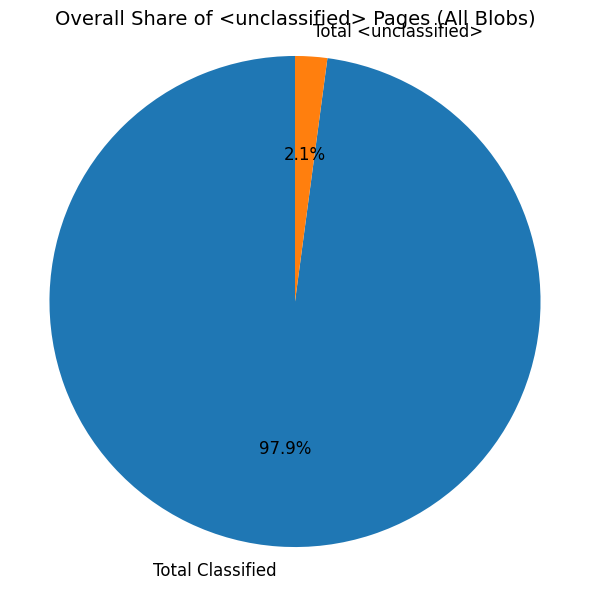

In [ ]:

# 3. REPORT the final overall numbers after the loop is complete.
print("\n" + "="*50)
print("OVERALL SUMMARY REPORT (ALL BLOBS)")
print("="*50)

# Check for division by zero if no documents were processed
total_pages = overall_classified_count + overall_unclassified_count
if total_pages > 0:
    unclassified_percentage = (overall_unclassified_count / total_pages) * 100
    print(f"Total Pages Processed: {total_pages}")
    print(f"  - Total Classified: {overall_classified_count}")
    print(f"  - Total <unclassified>: {overall_unclassified_count}")
    print(f"Overall <unclassified> Percentage: {unclassified_percentage:.2f}%")

    # Generate the overall pie chart
    plt.figure(figsize=(6,6))
    plt.pie([overall_classified_count, overall_unclassified_count],
            labels=["Total Classified", "Total <unclassified>"],
            autopct="%1.1f%%",
            startangle=90,
            textprops={'fontsize': 12})
    plt.title("Overall Share of <unclassified> Pages (All Blobs)", fontsize=14)
    plt.axis("equal")
    plt.tight_layout()

    plt.show()
    plt.close()
else:
    print("No data processed, skipping overall summary report.")

In [ ]:
!rm -r analysis_results

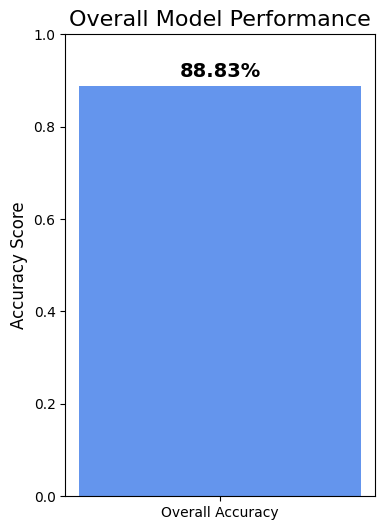

In [ ]:

overall_accuracy = np.mean(mean_accuracy)

# 1. Create the figure for the plot
plt.figure(figsize=(4, 6))

# FIX 3: Plot the single calculated value (overall_accuracy), not the list
plt.bar("Overall Accuracy", overall_accuracy, color='cornflowerblue', width=0.5)

# 3. Add a title and y-label
plt.title("Overall Model Performance", fontsize=16)
plt.ylabel("Accuracy Score", fontsize=12)

# 4. Set the y-axis limit to be from 0 to 1 (or 100%)
plt.ylim(0, 1.0)

# --- PRO TIP: Add the exact percentage on top of the bar ---
# FIX 4: Use the same consistent variable name here
plt.text(
    x=0, # The position of our single bar
    y=overall_accuracy + 0.02, # Position it slightly above the bar
    s=f"{overall_accuracy:.2%}", # The text to display
    ha='center', # Horizontal alignment
    fontsize=14,
    fontweight='bold'
)



plt.show()
plt.close()

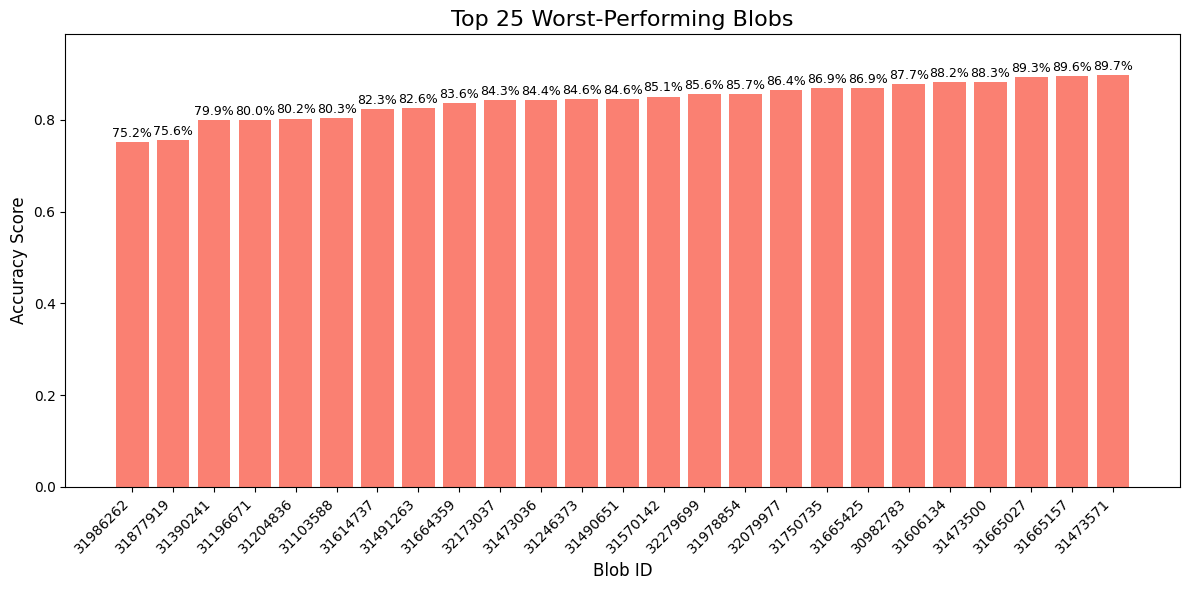

In [ ]:
# assume blobs and mean_accuracy are your lists
df = pd.DataFrame({
    "blob": blobs,
    "accuracy": mean_accuracy
})

# sort ascending and take the bottom 25
worst25 = df.sort_values("accuracy", ascending=True).head(25)

# 1. Create the figure
plt.figure(figsize=(12, 6))

# 2. Create the bar chart
bars = plt.bar(worst25["blob"], worst25["accuracy"], color='salmon')

# add exact percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.1%}',
             ha='center', va='bottom', fontsize=9)

# 3. Labels and title
plt.title("Top 25 Worst-Performing Blobs", fontsize=16)
plt.xlabel("Blob ID", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.ylim(0, worst25["accuracy"].max() * 1.1)

# 4. Rotate x-axis labels
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# 5. Show
plt.show()
plt.close()

In [ ]:
from google.colab import files
import os

folder_to_download = "analysis_results" # Replace with the name of your folder

# Check if the folder exists before trying to download
if os.path.exists(folder_to_download):
    # Zip the folder first to download it as a single file
    zip_filename = f"{folder_to_download}.zip"
    !zip -r "$zip_filename" "$folder_to_download"

    # Download the zip file
    files.download(zip_filename)

    # Optional: Remove the zip file after downloading
    # os.remove(zip_filename)
else:
    print(f"Folder '{folder_to_download}' not found.")

  adding: analysis_results/ (stored 0%)
  adding: analysis_results/32079977/ (stored 0%)
  adding: analysis_results/32079977/32079977_unclassified_share.png (deflated 13%)
  adding: analysis_results/32079977/32079977_unclassified_impact.png (deflated 22%)
  adding: analysis_results/32079977/32079977.csv (deflated 87%)
  adding: analysis_results/32079977/32079977_misclassifications.png (deflated 12%)
  adding: analysis_results/31714326/ (stored 0%)
  adding: analysis_results/31714326/31714326_misclassifications.png (deflated 11%)
  adding: analysis_results/31714326/31714326_unclassified_impact.png (deflated 22%)
  adding: analysis_results/31714326/31714326.csv (deflated 85%)
  adding: analysis_results/31714326/31714326_unclassified_share.png (deflated 13%)
  adding: analysis_results/31570142/ (stored 0%)
  adding: analysis_results/31570142/31570142_misclassifications.png (deflated 11%)
  adding: analysis_results/31570142/31570142_unclassified_impact.png (deflated 21%)
  adding: analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: how to make analysis results a zip t

folder_to_zip = "analysis_results" # The folder you created earlier

# Check if the folder exists before trying to zip
if os.path.exists(folder_to_zip):
    # Define the output zip filename
    zip_filename = f"{folder_to_zip}.zip"

    # Create the zip archive
    # The '-r' option for zip means recursive (include subdirectories)
    # The '$zip_filename' is the name of the output zip file
    # The '$folder_to_zip' is the folder to be zipped
    !zip -r "$zip_filename" "$folder_to_zip"

    # Optional: Download the zip file (if running in Colab)
    try:
        from google.colab import files
        print(f"\nZipped '{folder_to_zip}' into '{zip_filename}'.")
        print(f"Downloading '{zip_filename}'...")
        files.download(zip_filename)
    except ImportError:
        print("\n'google.colab' not found. Skipping automatic download.")
        print(f"Zipped '{folder_to_zip}' into '{zip_filename}'. You can download it manually.")

    # Optional: Clean up the generated zip file if you don't need it on the runtime anymore
    # os.remove(zip_filename)
else:
    print(f"Folder '{folder_to_zip}' not found. Cannot create zip file.")



  adding: analysis_results/ (stored 0%)
  adding: analysis_results/31103588/ (stored 0%)
  adding: analysis_results/31103588/31103588_unclassified_share.png (deflated 13%)
  adding: analysis_results/31103588/31103588_misclassifications.png (deflated 11%)
  adding: analysis_results/31103588/31103588_unclassified_impact.png (deflated 21%)
  adding: analysis_results/31103588/31103588.csv (deflated 87%)
  adding: analysis_results/31491263/ (stored 0%)
  adding: analysis_results/31491263/31491263_unclassified_impact.png (deflated 21%)
  adding: analysis_results/31491263/31491263.csv (deflated 84%)
  adding: analysis_results/31491263/31491263_misclassifications.png (deflated 11%)
  adding: analysis_results/31491263/31491263_unclassified_share.png (deflated 13%)
  adding: analysis_results/31473189/ (stored 0%)
  adding: analysis_results/31473189/31473189_unclassified_impact.png (deflated 21%)
  adding: analysis_results/31473189/31473189_misclassifications.png (deflated 11%)
  adding: analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>